In [1]:
import pandas as pd

# Load dataset
file_path = 'produksiPadi.xlsx'
padi_data = pd.read_excel(file_path)

# Membuat kolom lagging
padi_data['Lag_1'] = padi_data['Produksi Padi(Ton)'].shift(1)
padi_data['Lag_2'] = padi_data['Produksi Padi(Ton)'].shift(2)
padi_data['Lag_3'] = padi_data['Produksi Padi(Ton)'].shift(3)

# Hapus nilai NaN akibat lagging
padi_data_lagged = padi_data.dropna()


In [2]:
from sklearn.model_selection import train_test_split

# Fitur dan label
X = padi_data_lagged[['Lag_1', 'Lag_2', 'Lag_3']]
y = padi_data_lagged['Produksi Padi(Ton)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Membuat model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


MSE: 38321948061732.555
RMSE: 6190472.361761464
MAPE: 0.04975033965078592


In [4]:
# Data untuk prediksi
last_row = padi_data_lagged.iloc[-1]
lag_1 = last_row['Produksi Padi(Ton)']
lag_2 = last_row['Lag_1']
lag_3 = last_row['Lag_2']

# Prediksi 2023
pred_2023 = model.predict([[lag_1, lag_2, lag_3]])

# Update lagging untuk prediksi 2024
lag_1, lag_2, lag_3 = pred_2023[0], lag_1, lag_2

# Prediksi 2024
pred_2024 = model.predict([[lag_1, lag_2, lag_3]])

print(f"Prediksi 2023: {pred_2023[0]}")
print(f"Prediksi 2024: {pred_2024[0]}")


Prediksi 2023: 55583328.33409675
Prediksi 2024: 56937262.30260654


c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


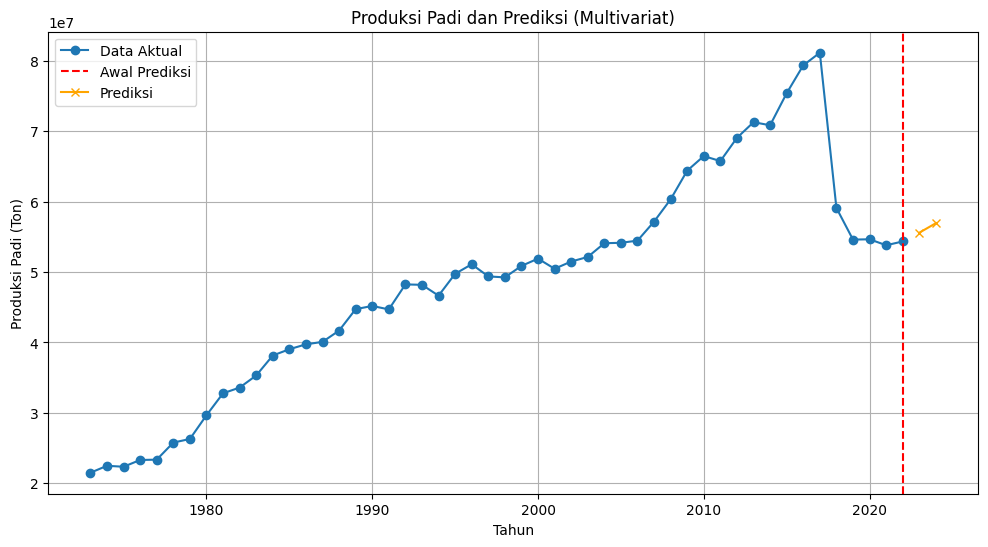

In [5]:
import matplotlib.pyplot as plt

# Data asli dan prediksi
plt.figure(figsize=(12, 6))
plt.plot(padi_data_lagged['Tahun'], padi_data_lagged['Produksi Padi(Ton)'], label='Data Aktual', marker='o')
plt.axvline(x=2022, color='r', linestyle='--', label='Awal Prediksi')

# Tambahkan prediksi ke grafik
tahun_prediksi = [2023, 2024]
produksi_prediksi = [pred_2023[0], pred_2024[0]]
plt.plot(tahun_prediksi, produksi_prediksi, label='Prediksi', marker='x', color='orange')

# Labeling dan legenda
plt.title('Produksi Padi dan Prediksi (Multivariat)')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.legend()
plt.grid(True)
plt.show()


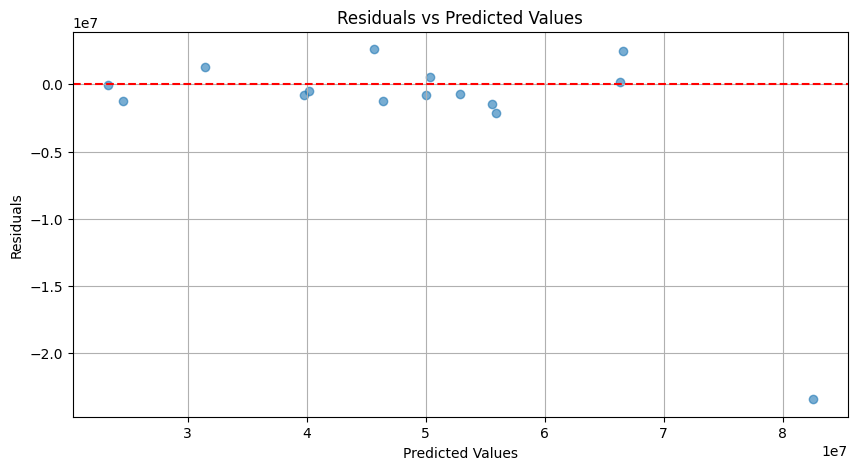

In [6]:
# Residuals
residuals = y_test - y_pred

# Scatter plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', linewidth=1.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
